Copyright ENEOS, Corp., Preferred Computational Chemistry, Inc. and Preferred Networks, Inc. as contributors to Matlantis contrib project

This document was machine translated from Japanese to English.

# GUI for searching structures from DFT databases (such as Materials Project)

The function to display Matlantis version is also included. #eneos ibuka 2022/10/1

The `crystalsearch` module internally uses the Materials Project database.

Database is from  
A. Jain*, S.P. Ong*, G. Hautier, W. Chen, W.D. Richards, S. Dacek, S. Cholia, D. Gunter, D. Skinner, G. Ceder, K.A. Persson (*=equal contributions)  
The Materials Project: A materials genome approach to accelerating materials innovation  
APL Materials, 2013, 1(1), 011002.  
[doi:10.1063/1.4812323](http://dx.doi.org/10.1063/1.4812323)  
[[bibtex]](https://materialsproject.org/static/docs/jain_ong2013.349ca3156250.bib)  
Licensed under [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)  

In [1]:
import  crystalsearch as cs 

In [2]:
m = cs.Crystalsearch()

Below is the operation after selecting [Fe, O, C] and executing the [hullview] button. Search results can be obtained with `instance_name.cands`.

In [3]:
cands = m.cands

In [4]:
cands

,material_id,pretty_formula,energy,e_above_hull,is_hubbard,elements,atoms
0,mp-13,Fe,-8.470009,0.000000,False,[Fe],"(Atom('Fe', [0.0, 0.0, 0.0], index=0))"
1,mp-47,C,-36.261055,0.161517,False,[C],"(Atom('C', [-1.1144813925056951e-06, 1.4509361..."
2,mp-48,C,-36.881187,0.006484,False,[C],"(Atom('C', [0.0, 0.0, 6.5137786865234375], ind..."
3,mp-66,C,-18.180737,0.136413,False,[C],"(Atom('C', [1.263497233390808, 0.7294805049896..."
4,mp-136,Fe,-16.744431,0.097793,False,[Fe],"(Atom('Fe', [-1.0390743909738376e-06, 1.423605..."
...,...,...,...,...,...,...,...
173,mvc-12204,FeO2,-218.275894,0.271338,True,"[Fe, O]","(Atom('Fe', [6.014296531677246, 3.451520204544..."
174,mvc-12205,Fe9O13,-142.633408,0.263188,True,"[Fe, O]","(Atom('Fe', [5.969217777252197, 1.786785602569..."
175,mvc-12905,FeO2,-73.856781,0.179825,True,"[Fe, O]","(Atom('Fe', [-1.005743384361267, 1.72052621841..."
176,mvc-13234,FeO2,-218.290543,0.270931,True,"[Fe, O]","(Atom('Fe', [4.6083173751831055, 0.87333792448..."


We will compare the energies of pfp and the Materials Project.

calc 178 cands by pfp v6.0.0
[WARNING] 111 / 178 atoms contain Hubbard U correction, its U parameter might be different between Materials project & PFP. Please check carefully.


  0%|          | 0/178 [00:00<?, ?it/s]

end


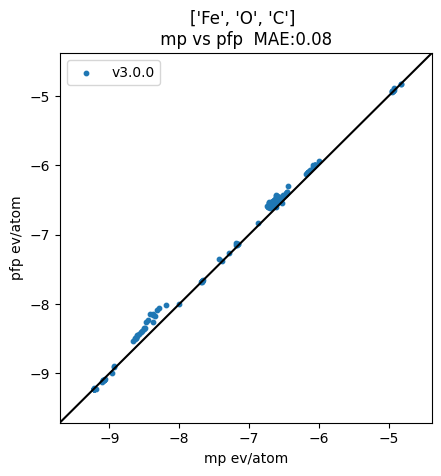

,material_id,pretty_formula,energy,e_above_hull,is_hubbard,elements,atoms,pfpene,pfpfmax,lenatoms
0,mp-13,Fe,-8.470009,0.000000,False,[Fe],"(Atom('Fe', [0.0, 0.0, 0.0], index=0))",-8.255983,0.00000,1
1,mp-47,C,-36.261055,0.161517,False,[C],"(Atom('C', [-1.1144813925056951e-06, 1.4509361...",-36.337568,0.00091,4
2,mp-48,C,-36.881187,0.006484,False,[C],"(Atom('C', [0.0, 0.0, 6.5137786865234375], ind...",-36.896414,0.00008,4
3,mp-66,C,-18.180737,0.136413,False,[C],"(Atom('C', [1.263497233390808, 0.7294805049896...",-18.185249,0.00000,2
4,mp-136,Fe,-16.744431,0.097793,False,[Fe],"(Atom('Fe', [-1.0390743909738376e-06, 1.423605...",-16.305621,0.00002,2


In [5]:
pfpdf = m.get_pfp_df()
pfpdf.head()

We draw the phasediagram with the results of pfp.

In [6]:
pd = cs.get_phasediagram(pfpdf , energy = "pfpene")
pfppdfig = cs.get_phasediagram_fig(pd, show_unstable=1 )
print("pfp")
display (pfppdfig)
print("Original Materials Project")
#One time it is displayed as above, and the second time it is displayed, somehow it becomes clean (blue line).
display (m.pdfig) 

pfp


FigureWidget({
    'data': [{'a': [0, 0, None, 16.0, 0, None, 0, 1.0, None, 0, 1.0, None, 16.0,
                    1.0, None, 0, 0, None, 0, 16.0, None],
              'b': [4.0, 0, None, 0, 0, None, 4.0, 0, None, 4.0, 0, None, 0, 0,
                    None, 4.0, 4.0, None, 4.0, 0, None],
              'c': [8.0, 2.0, None, 24.0, 2.0, None, 8.0, 0, None, 0, 0, None,
                    24.0, 0, None, 8.0, 0, None, 8.0, 24.0, None],
              'hoverinfo': 'none',
              'line': {'color': 'black', 'width': 1.5},
              'marker': {'size': 4},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatterternary',
              'uid': '2f076563-9613-448d-b5d0-f151e6ec3e1f'},
             {'a': [0, 0, 1.0],
              'b': [4.0, 4.0, 0],
              'c': [0, 8.0, 0],
              'fill': 'toself',
              'fillcolor': '#2E91E5',
              'hovertemplate': '<extra></extra>',
              'line': {'width': 0},
            

Original Materials Project


FigureWidget({
    'data': [{'a': [0, 1.0, None, 0, 2.0, None, 4.0, 0, None, 0, 1.0, None, 0, 0,
                    None, 2.0, 4.0, None, 0, 4.0, None, 4.0, 1.0, None, 0, 0, None,
                    2.0, 1.0, None],
              'b': [4.0, 0, None, 4.0, 2.0, None, 0, 0, None, 4.0, 0, None, 4.0,
                    4.0, None, 2.0, 0, None, 4.0, 0, None, 0, 0, None, 4.0, 0,
                    None, 2.0, 0, None],
              'c': [8.0, 0, None, 8.0, 6.0, None, 6.0, 8.0, None, 0, 0, None, 8.0,
                    0, None, 6.0, 6.0, None, 8.0, 6.0, None, 6.0, 0, None, 8.0,
                    8.0, None, 6.0, 0, None],
              'hoverinfo': 'none',
              'line': {'color': 'black', 'width': 1.5},
              'marker': {'size': 4},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatterternary',
              'uid': 'dcd540c7-8525-49ba-9817-9a9d57523487'},
             {'a': [0, 0, 1.0],
              'b': [4.0, 4.0, 0],
          

**How to Access Atoms Objects**

The Atoms object in the dataframe is a primitive cell.

In [7]:
cands.loc[5].atoms

Atoms(symbols='Fe', pbc=True, cell=[[2.577899217605591, 0.0, 0.0], [1.2889496088027954, 2.2325263023376465, 0.0], [1.2889496088027954, 0.744175374507904, 2.1048457622528076]], calculator=ASECalculator(...))

To access the conventional cell, use the following.

In [8]:
cs.get_conventional(cands.loc[[5]]) # please check the spglib version is >= 2.3.0

[Atoms(symbols='Fe4', pbc=True, cell=[3.6457000078888497, 3.6457000078888497, 3.6457000078888497])]

You can access the entire database with the following.

In [9]:
cs.df

,material_id,pretty_formula,energy,e_above_hull,is_hubbard,elements,atoms
0,mp-1,Cs,-0.856633,0.038770,False,[Cs],"(Atom('Cs', [0.0, 0.0, 0.0], index=0))"
1,mp-2,Pd,-5.179882,0.000000,False,[Pd],"(Atom('Pd', [0.0, 0.0, 0.0], index=0))"
2,mp-3,Cs,-1.598010,0.096397,False,[Cs],"(Atom('Cs', [3.6706762313842773, 3.38793683052..."
3,mp-4,Nd,-4.628184,0.139959,False,[Nd],"(Atom('Nd', [0.0, 0.0, 0.0], index=0))"
4,mp-7,S,-24.431696,0.064501,False,[S],"(Atom('S', [-2.1066184043884277, -2.1441278457..."
...,...,...,...,...,...,...,...
139362,mvc-16821,CaCr2O4,-105.019547,0.107777,True,"[Cr, O, Ca]","(Atom('Ca', [-1.5691694021224976, 1.5241652727..."
139363,mvc-16832,V2ZnO4,-96.660103,0.161231,True,"[Zn, O, V]","(Atom('V', [3.009662389755249, 0.0, 0.0], inde..."
139364,mvc-16833,AlV2O4,-106.922005,0.207305,True,"[O, V, Al]","(Atom('Al', [-1.4248672723770142, -1.519302725..."
139365,mvc-16834,MgMn2O4,-98.566040,0.105475,True,"[Mg, O, Mn]","(Atom('Mg', [0.0, 0.0, 0.0], index=0), Atom('M..."
